In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [40]:
df = pd.read_csv('https://drive.google.com/uc?export=download&id=1kvPjR9qztx0SatUfQXQ806xdfGKdVE37')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [41]:
df.isnull().sum()

,0
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


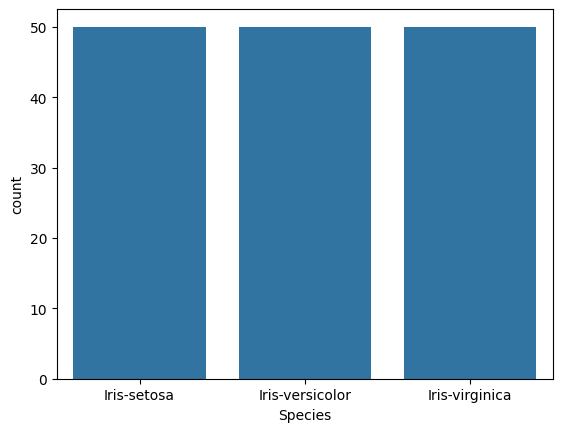

In [42]:
sns.countplot(x="Species", data=df)
plt.show()

In [43]:
#fitur untuk clustering
X = df.drop(['Id', 'Species'], axis=1)

In [44]:
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


StandarScaler menstandarkan semua fitur menjadi mean = 0 dan standar deviasi = 1 sehingga kontribusi fitur menjadi seimbang

In [45]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['SpeciesEncoded'] = le.fit_transform(df['Species'])

In [46]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

#Re-initlalize x from the original Dataframe 'df'
#This ensures x is a Dataframe with named columns for indexing before scaling
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]

# Now Apply the scaling
X = scaler.fit_transform(X)
X[:5]

array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.38535265,  0.33784833, -1.39813811, -1.31297673],
       [-1.50652052,  0.10644536, -1.2844067 , -1.31297673],
       [-1.02184904,  1.26346019, -1.3412724 , -1.31297673]])

**Mencari Nilai K Terbaik**

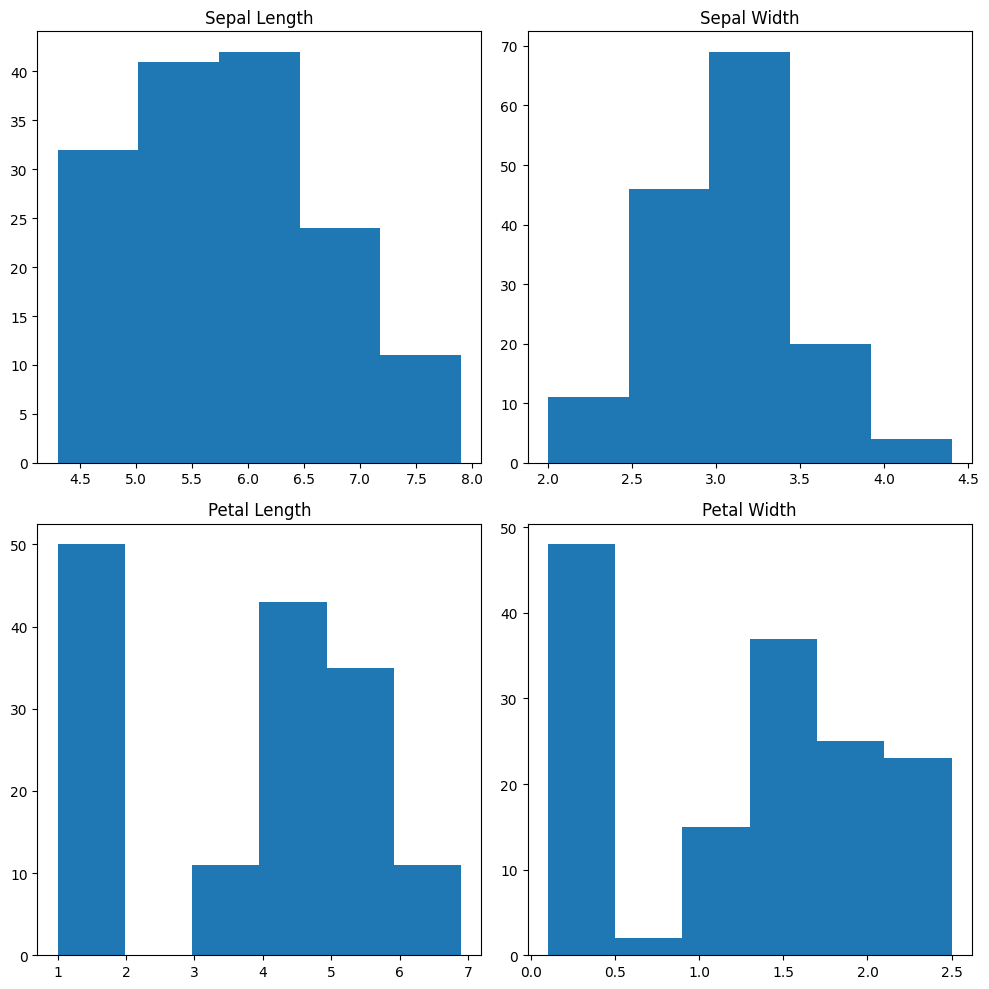

In [47]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

#Histogram  1: Sepal Lenght
axes[0, 0].set_title('Sepal Length')
axes[0, 0].hist(df['SepalLengthCm'], bins=5)

#Histogram 2: Sepal width
axes[0, 1].set_title('Sepal Width')
axes[0, 1].hist(df['SepalWidthCm'], bins=5)

#Histogram 3: Petal Lenght
axes[1, 0].set_title('Petal Length')
axes[1, 0].hist(df['PetalLengthCm'], bins=6)

#Histogram 4: Petal Width
axes[1, 1].set_title('Petal Width')
axes[1, 1].hist(df['PetalWidthCm'], bins=6)

plt.tight_layout()
plt.show()




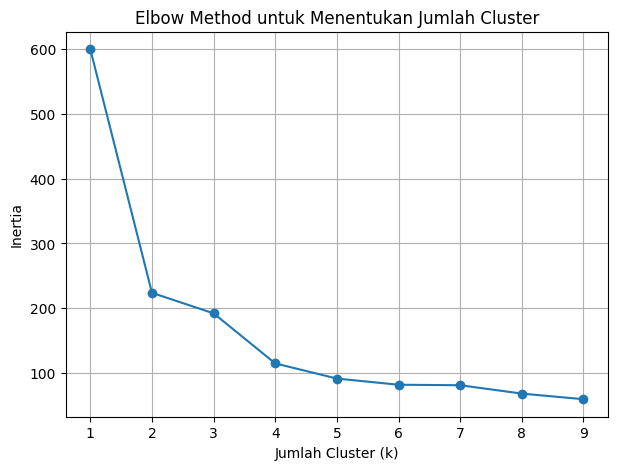

In [48]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia_list = []
k_range = range(1, 10)

for k in k_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X)
    inertia_list.append(km.inertia_)

plt.figure(figsize=(7,5))
plt.plot(k_range, inertia_list, marker='o')
plt.title("Elbow Method untuk Menentukan Jumlah Cluster")
plt.xlabel("Jumlah Cluster (k)")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

In [49]:
from sklearn.cluster import KMeans

kmeans = KMeans(
    n_clusters=3,        # Karena dataset Iris ada 3 spesies
    init="k-means++",
    random_state=42
)

In [50]:
# 1. Latih model (menentukan centroid + proses clustering)
kmeans.fit(X)

KMeans(n_clusters=3, random_state=42)

In [51]:
# 2. Prediksi cluster untuk data X
labels = kmeans.predict(X)

In [52]:
# 3. Masukkan ke DataFrame
df["Cluster"] = labels

In [53]:
df["Cluster"] = kmeans.predict(X)

print("Cluster ditemukan:", df["Cluster"].unique())

Cluster ditemukan: [1 2 0]


<Axes: xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

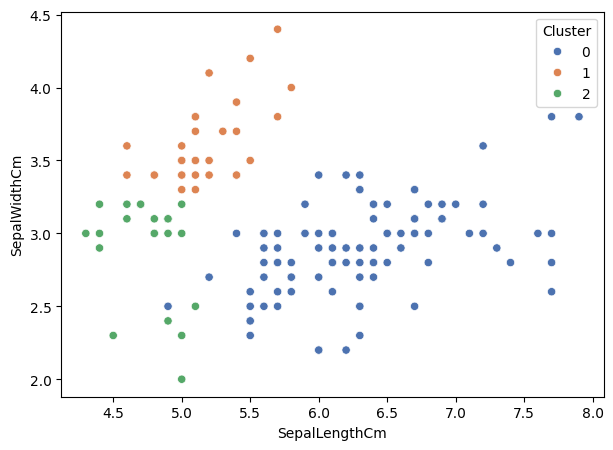

In [55]:
plt.figure(figsize=(7, 5))
sns.scatterplot(
    x=df["SepalLengthCm"],
    y=df["SepalWidthCm"],
    hue=df["Cluster"],
    palette="deep"
    )

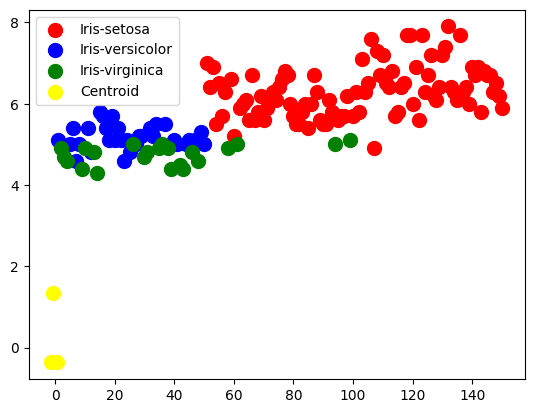

In [56]:
# Visualising the clusters
plt.scatter(df[df['Cluster'] == 0].iloc[:, 0], df[df['Cluster'] == 0].iloc[:, 1],
            s = 100, c = 'red', label = 'Iris-setosa')

plt.scatter(df[df['Cluster'] == 1].iloc[:, 0], df[df['Cluster'] == 1].iloc[:, 1],
            s = 100, c = 'blue', label = 'Iris-versicolor')

plt.scatter(df[df['Cluster'] == 2].iloc[:, 0], df[df['Cluster'] == 2].iloc[:, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s = 100, c = 'yellow', label = 'Centroid')

plt.legend()
plt.show()